# Neuronale Netze zur Erkennung handgeschriebener Ziffern

... und ein kleiner Einblick in die Anwendung von Linearer Algebra und Analysis

# Wir lösen Probleme mit Daten typischerweise am PC

hier wird die Programmiersprache Python verwendet, 

In [1]:
# zum arbeiten mit vektoren
import numpy as np 
# zum arbeiten mit den Datentabellen
import pandas as pd
# zum anzeigen von Bildern
import matplotlib.pyplot as plt
# für die Neuronalen netze
from tensorflow import keras

from IPython.display import Image

# Zuerst ein Blick in die Daten

In [2]:
# Daten werden oft als Tabellen gespeichert "csv" steht für comma seperated values
df_train = pd.read_csv("./data/mnist_train.csv")
df_test = pd.read_csv("./data/mnist_test.csv")

In [3]:
# Ein schwarz/weiß Bild ist im Grunde genommen nichts anderes als eine Matrix 
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Wir testen ob die Daten tatsächlich Bilder sind

Wir haben 28 * 28 = 784 Pixel als Input und hoffen das in den scharz/weiß Werten genug Infos stecken um die Ziffer vorherzusagen.

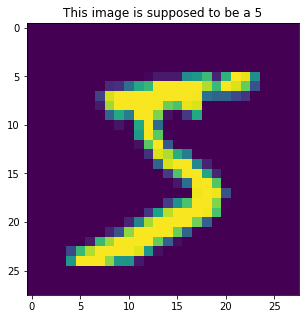

In [4]:
train_labels = np.zeros((len(df_train["label"]), 10))
train_values = df_train.drop(columns = "label").values

# lets see how a single row can be displayed as a matrix:
img0 = np.reshape(train_values[0], (28,28))

# for the programming interested people:
fig, ax = plt.subplots(1, figsize = (5,5))
ax.set_title(f"This image is supposed to be a {df_train['label'][0]}")
ax.imshow(img0)

# Wir müssen die Daten etwas umbauen

Wir fitten eine funktion der Form:

$f:\mathbb{R}^{784} \to \mathbb{R}^{10}$

### Input: 
Wir haben 28 * 28 = 784 Pixel als Input und hoffen das in den scharz/weiß Werten genug Infos stecken um die Ziffer vorherzusagen.

### Output 
Vektor in $\mathbb{R}^{10}$ als Output. Wobei wir als Vorhersage den Index des größten Wertes aus $f(x)$ wählen. So Codieren wir z.B. eine drei als: 

$(0,0,0,1,0,0,0,0,0,0)^T$

# Techische Arbeit

Wir müssen unsere Trainigsdaten vorbereiten und konvertieren sie in das Format unserer Vorhersagefunktion

In [5]:
train_labels = np.zeros((len(df_train["label"]), 10))
train_values = df_train.drop(columns = "label").values

for i, val in enumerate(df_train["label"]):
    train_labels[i,val] = 1

test_labels = np.zeros((len(df_test["label"]), 10))
test_values = df_test.drop(columns = "label").values

for i, val in enumerate(df_test["label"]):
    test_labels[i,val] = 1

# Die Details zu Neuronalen Netzen

Wir überlegen uns nun eine Architektur für ein Neuronales Netz:

Als einfacher Einstieg ist z.B. Ein Netz mit einer "Hidden Layer" mit doppelt so vielen Knoten wir der Input eine gute Idee. Unser Neutronales Netz sieht also folgendermaßen aus:

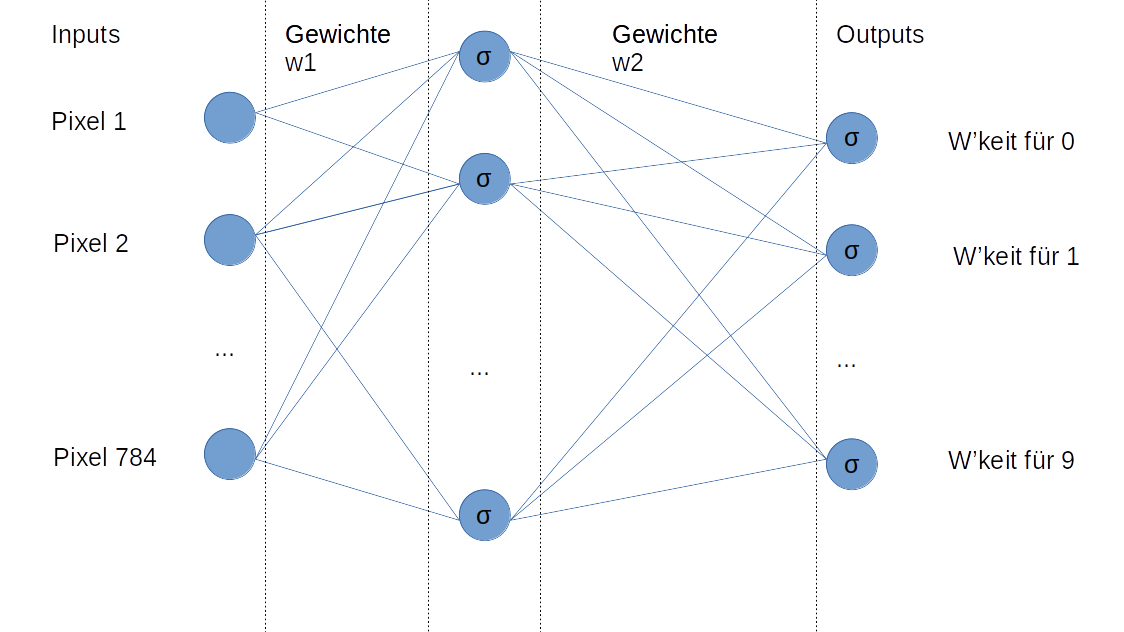

In [6]:
Image("./misc/nnet.png")

# Formeller Aufbau

Seien: zwei Funktionen $\sigma_1, \sigma_2$ Vektorfelder, die in jeder Komponente aus der Funktion 

$\quad \sigma \colon \mathbb{R} \to \mathbb{R}, x \mapsto \sigma(x) := \frac{1}{1 + e^x}$ bestehen. Die Funktion hat als Wertebereich $[0,1]$, also passt insbesondere der Output zu unserer Codierung

Unser Neuronales Netz ist nun gegeben als die Funktion: 

$\quad f_w(x) = \sigma_2(w_2 \sigma_1(w_1 x)) \quad , w_1 \in \mathbb{R}^{1568 \times 784}, w_2 \in \mathbb{R}^{10 \times 1568} $

$\to$ Die Matrizen $w_1, w_2$ sind gerade alle Gewichte zwischen den Layern zusammengefasst

# Wie trainieren wir ein Neuronales Netz ? 

* Wir minimieren auf unseren Testdaten eine Verlustfunktion $d$, $\to$ wenig verlust auf Trainingsdaten führt zu besserem Modell
* Einfacher Ansatz: Wir Minimieren $d(y, f_w(x))$ auf unseren Testdaten, wir "lernen" also aus unseren Testdaten das Problem
* Wahl: $d(x,f_w(x)) = \|y - f_w(x)\|_2^2$

Formell versuchen wir also folgendes Problem zu lösen um bestmögliche Kantengewichte $w$ zu erhalten:

$\quad argmin_{w} \quad d(y, f_w(x))$ auf unseren 60000 Trainingsbildern $x$ mit Labels $y$

# Backpropagation

Q: Wie machen wir das ? 

A: Wir lösen das Problem approximativ durch schrittweises ablaufen der Richtung $-\frac{d}{dw_{i,j,k}} \|y - f_w(x)\|_2^2$, also jeweils kleine Verbesserungen in die Richtung des Steilsten Abstiegs bzgl des Verlusts.

einfacher Einstieg: [Link](https://www.youtube.com/watch?v=tIeHLnjs5U8)

$\to$ Herleitung Tafel 

# Umsetzung in Python mit Keras

### Modellarchitektur

In [7]:
# specify the shape of our neural net
model = keras.models.Sequential([
    # hidden state
    keras.layers.Dense(784 * 2, activation= keras.activations.sigmoid, use_bias=False),
    # output state
    keras.layers.Dense(10, activation= keras.activations.sigmoid, use_bias=False)
])

# Festlegen des Verlusts und der Art und weise zu Optimieren

In [8]:
# define the gradient based way to optimize our weights w
optimizer = keras.optimizers.SGD()

# define the function which tells us how "good" the fit is
loss = keras.losses.MSE

model.compile(
    optimizer = optimizer,
    loss = loss,
)

# untrainiertes Modell
model.predict(test_values[0:1])

array([[0.13741764, 0.28617066, 0.79030985, 0.6457138 , 0.54255074,
        0.5508227 , 0.3875779 , 0.25063527, 0.62534535, 0.36880952]],
      dtype=float32)

# Trainineren des Modells mit dem berechneten Gradientenverfahren

In [9]:
model.fit(
    train_values,
    train_labels,
    epochs = 10, # use every data point ten times to adjust gradient
    verbose = 2
)

Train on 60000 samples
Epoch 1/10
60000/60000 - 11s - loss: 0.0551
Epoch 2/10
60000/60000 - 10s - loss: 0.0305
Epoch 3/10
60000/60000 - 10s - loss: 0.0246
Epoch 4/10
60000/60000 - 10s - loss: 0.0215
Epoch 5/10
60000/60000 - 11s - loss: 0.0195
Epoch 6/10
60000/60000 - 12s - loss: 0.0181
Epoch 7/10
60000/60000 - 11s - loss: 0.0170
Epoch 8/10
60000/60000 - 12s - loss: 0.0161
Epoch 9/10
60000/60000 - 12s - loss: 0.0153
Epoch 10/10
60000/60000 - 12s - loss: 0.0146


# Evaluieren des Modells auf den unbekannten Testdaten

In [13]:
preds = model.predict(test_values)
preds = np.argmax(preds, axis = 1)

In [14]:
correct_preds = preds == df_test["label"].values
acc = sum(correct_preds.astype(float)) / len(preds)
print(f"The accuracy on the unknown images is {100 * acc}%")

The accuracy on the unknown images is 92.49000000000001%


# Wir schauen uns mal ein Bild und die Prediction dazu an:

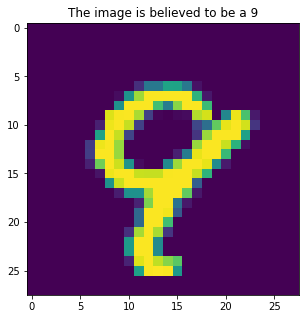

In [12]:
random_index = np.random.randint(low = 0, high = 9999)
img0 = np.reshape(test_values[random_index], (28,28))
fig, ax = plt.subplots(1, figsize = (5,5))
ax.set_title(f"The image is believed to be a {preds[random_index]}")
ax.imshow(img0)